# Kernel Introduction

## Algebra
Kernel is often introduced by SVM (support vector machine). However, it can be introduced from linear regression. The error function of linear regression with regulation is:

$$
E(\boldsymbol{w}) = 
\frac{1}{2}\sum_{n=1}^N(\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x}_n) - t_n)^2 - \frac{\lambda}{2}\boldsymbol{w}^T\boldsymbol{w}
$$

By setting its derivative with respect to $\boldsymbol{w}$ to be zero:

$$
\boldsymbol{w} = -\frac{1}{\lambda}\sum_{n=1}^N(\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x}_n) - t_n)\boldsymbol{\phi}(\boldsymbol{x}_n)
$$

By some algebra, we could get:

$$
\boldsymbol{w} = (\lambda I_M + \Phi^T\Phi)^{-1}\Phi^T\boldsymbol{t}
$$

where $\Phi$ is the design matrix:

$$
\left(
\begin{matrix}
\phi_1(\boldsymbol{x}_1)&\phi_2(\boldsymbol{x}_1)&\cdots&\phi_M(\boldsymbol{x}_1)\\
\phi_1(\boldsymbol{x}_2)&\phi_2(\boldsymbol{x}_2)&\cdots&\phi_M(\boldsymbol{x}_2)\\
\vdots & \vdots & \ddots & \vdots \\
\phi_1(\boldsymbol{x}_N)&\phi_2(\boldsymbol{x}_N)&\cdots&\phi_M(\boldsymbol{x}_N)\\
\end{matrix}
\right)
$$

But we could also define $\boldsymbol{a} = (a_1, a_2, ..., a_N)$, where $a_i=-\frac{1}{\lambda}(\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x}_n) - t_n)$, then $\boldsymbol{w} = \Phi^T\boldsymbol{a}$. Note that this is not an explicit result where $\boldsymbol{w}$ is included in $\boldsymbol{a}$. It we substitute $\boldsymbol{w}$ into the loss function, then we have:

$$
\begin{align}
E(\boldsymbol{a}) &=  
\frac{1}{2}\sum_{n=1}^N(\boldsymbol{a}^T\Phi\boldsymbol{\phi}(\boldsymbol{x}_n) - t_n)^2 - 
\frac{\lambda}{2}\boldsymbol{a}^T\Phi\Phi^T\boldsymbol{a} \\
&=\frac{1}{2}\boldsymbol{a}^T\Phi\Phi^T\Phi\Phi^T\boldsymbol{a} - \boldsymbol{a}^T\Phi\Phi^T\boldsymbol{t}
+ \frac{1}{2}\boldsymbol{t}^T\boldsymbol{t} - 
\frac{\lambda}{2}\boldsymbol{a}^T\Phi\Phi^T\boldsymbol{a}
\end{align}
$$

We can define **Gram matrix** $K=\Phi\Phi^T$, where K is an N by N matrix and $K_{nm} = \boldsymbol{\phi}(\boldsymbol{x}_n)^T\boldsymbol{\phi}(\boldsymbol{x}_m) = k(\boldsymbol{x_n}, \boldsymbol{x_m})$. $k(\boldsymbol{x_n}, \boldsymbol{x_m})$ is the **kernel function**.

Up to now, maybe it is confused why we should introduce Gram matrix and a "weird" $\boldsymbol{a}$. Don't worry. Let's see how to express $\boldsymbol{w}$ by $\boldsymbol{a}$. 

With Gram matrix, we have:

$$
E(\boldsymbol{a}) = \frac{1}{2}\boldsymbol{a}^TK^TK\boldsymbol{a} - \boldsymbol{a}^TK\boldsymbol{t} 
+ \frac{1}{2}\boldsymbol{t}^T\boldsymbol{t} + \frac{\lambda}{2}\boldsymbol{a}^TK\boldsymbol{a}
$$

By setting its derivative with respect to $\boldsymbol{a}$ to be zero:

$$
\boldsymbol{a} = (K + \lambda I_N)\boldsymbol{t}
$$

and

$$
\boldsymbol{w} = \Phi^T\boldsymbol{a} = \Phi^T(K + \lambda I_N)\boldsymbol{t}
$$

**Note**

------
**By comparing this result with the previous one without Gram matrix**, it can be found that the key different is $\Phi\Phi^T$ (an **N by N matrix**) and $\Phi^T\Phi$ (an **M by M matrix**). When N > M, the most usual case where the volume of dataset is larger than the number of features, obviously $\Phi^T\Phi$ is a better choice. HOWEVER, if we would like to have infinite number of feature, i.e. M >> N, then Gram matrix will be better and this is the MAIN PURPOSE to introduce kernel function.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

BELTA = 10

def base_func(base_type, x, j, N):
    centers = [-1 + 2*i/N for i in range(0, N)]
    if base_type == "Polynomial":
        return x**j
    elif base_type == "Guassian":
        return norm.pdf((x-centers[j])/0.1)/0.1
    elif base_type == "Sigmoid":
        return (np.tanh((x-centers[j])/0.1)+1)/2
    else:
        print("No such type")
        raise
        
def base_plots(N, X):
    fig, axes = plt.subplots(1, 3, figsize = (20, 5))
    base_type = ["Polynomial", "Guassian", "Sigmoid"]
    
    for i in range(3):
        for j in range(N):
            axes[i].plot(X, base_func(base_type[i], X, j, N))
            axes[i].set_title("{} basis functions (N={})".format(base_type[i], N), fontsize = 15)
    plt.show()
    
def kernel_plots(center, N, X):
    fig, axes = plt.subplots(1, 3, figsize = (20, 5))
    base_type = ["Polynomial", "Guassian", "Sigmoid"]
    
    ans = 0
    i = 0
    for j in range(N):
        ans += base_func(base_type[i], X, j, N) * base_func(base_type[i], center, j, N)
    print(ans)
    j = 2
    
    #axes[i].plot(X, base_func(base_type[i], X, j, N) * base_func(base_type[i], center, j, N))
    axes[i].plot(X, ans)
    



In [5]:
X

array([ -1.00000000e+00,  -9.90000000e-01,  -9.80000000e-01,
        -9.70000000e-01,  -9.60000000e-01,  -9.50000000e-01,
        -9.40000000e-01,  -9.30000000e-01,  -9.20000000e-01,
        -9.10000000e-01,  -9.00000000e-01,  -8.90000000e-01,
        -8.80000000e-01,  -8.70000000e-01,  -8.60000000e-01,
        -8.50000000e-01,  -8.40000000e-01,  -8.30000000e-01,
        -8.20000000e-01,  -8.10000000e-01,  -8.00000000e-01,
        -7.90000000e-01,  -7.80000000e-01,  -7.70000000e-01,
        -7.60000000e-01,  -7.50000000e-01,  -7.40000000e-01,
        -7.30000000e-01,  -7.20000000e-01,  -7.10000000e-01,
        -7.00000000e-01,  -6.90000000e-01,  -6.80000000e-01,
        -6.70000000e-01,  -6.60000000e-01,  -6.50000000e-01,
        -6.40000000e-01,  -6.30000000e-01,  -6.20000000e-01,
        -6.10000000e-01,  -6.00000000e-01,  -5.90000000e-01,
        -5.80000000e-01,  -5.70000000e-01,  -5.60000000e-01,
        -5.50000000e-01,  -5.40000000e-01,  -5.30000000e-01,
        -5.20000000e-01,

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


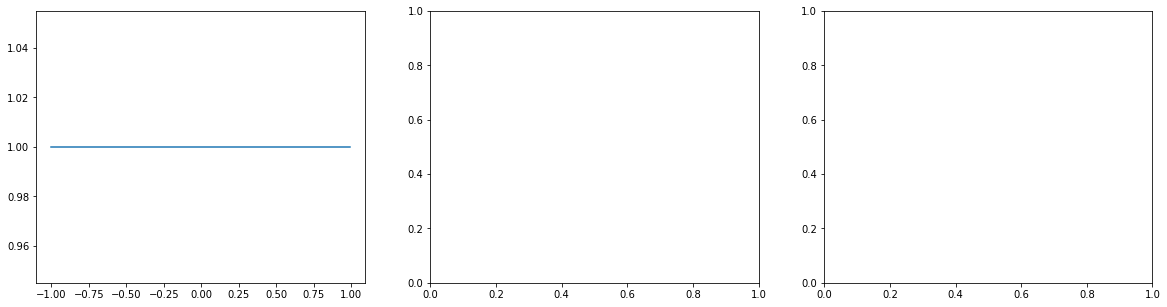

In [8]:
kernel_plots(0, 10, X)

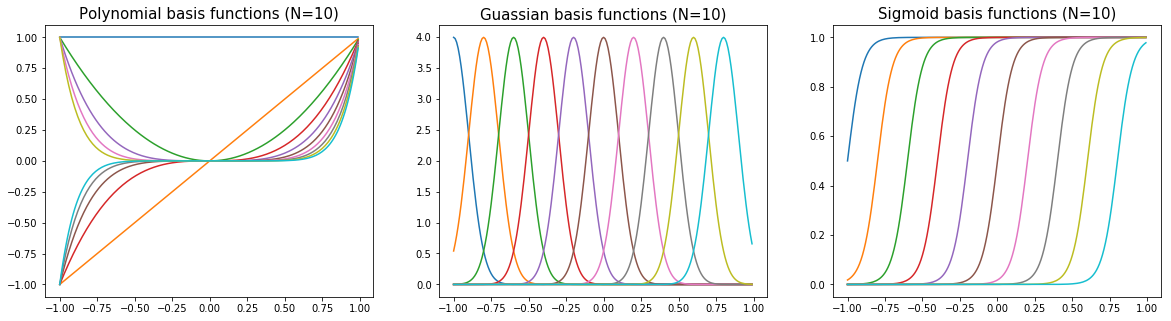

In [4]:
X = np.arange(-1,1,0.01)
Y = np.sin(X*np.pi)
base_plots(10, X)